Silhouette Plot

In [1]:
from clustering_functions import *
from sklearn.metrics import silhouette_score
from pre_processing_functions import preprocess
from pre_processing_functions import preprocess_semscalling
%load_ext autoreload
%autoreload 2

In [2]:
df= clustering('customer_info.csv')

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.1962801913295817


In [3]:
def calcular_silhouettes(X, dicionario_labels):
    for nome, labels in dicionario_labels.items():
        if len(set(labels)) > 1:
            try:
                score = silhouette_score(X, labels)
                print(f"{nome}: Silhouette Score = {score:.3f}")
            except Exception as e:
                print(f"{nome}: Erro ao calcular o silhouette score → {e}")
        else:
            print(f"{nome}: apenas um cluster encontrado (não é possível calcular o silhouette score)")

In [5]:
label_dict = {
    "KMeans": df['Kmeans_cluster'].values,
    "SOM": df['som_cluster'].values,
    "Hierarchical": df['hierarchical_cluster'].values
}

data = df[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
scores = calcular_silhouettes(data, label_dict)


KMeans: Silhouette Score = 0.195
SOM: Erro ao calcular o silhouette score → unhashable type: 'numpy.ndarray'
Hierarchical: Silhouette Score = 0.163


In [6]:
import umap
import numpy as np

# Reduzir para 2 dimensões
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_2d.fit_transform(data)

/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
scores_umap = calcular_silhouettes(X_umap, label_dict)

KMeans: Silhouette Score = 0.402
SOM: Erro ao calcular o silhouette score → unhashable type: 'numpy.ndarray'
Hierarchical: Silhouette Score = 0.437


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(df, feature_cols, cluster_col):
    X = df[feature_cols].values
    labels = df[cluster_col].values
    n_clusters = len(np.unique(labels))

    silhouette_vals = silhouette_samples(X, labels)
    silhouette_avg = silhouette_score(X, labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in np.unique(labels):
        ith_cluster_vals = silhouette_vals[labels == i]
        ith_cluster_vals.sort()

        size_cluster_i = ith_cluster_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Coeficiente de Silhueta")
    ax.set_ylabel("Label do Cluster")
    ax.set_title(f"Silhouette Plot - {cluster_col}")
    plt.show()

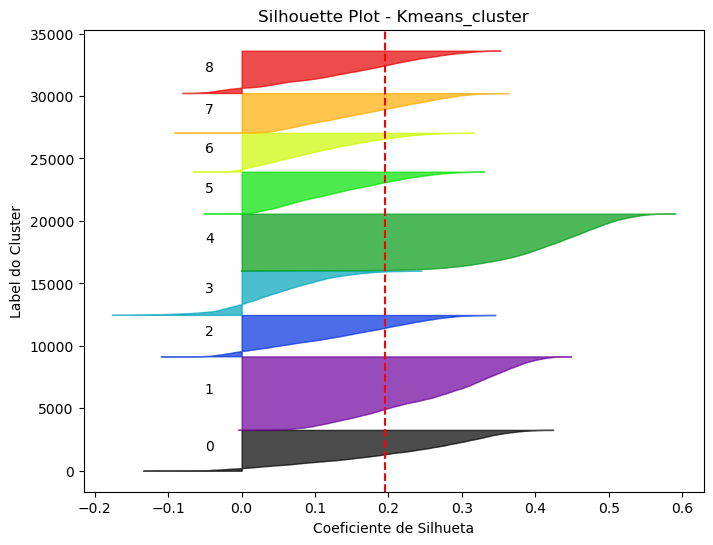

In [9]:
plot_silhouette(df, ['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products'], 'Kmeans_cluster')

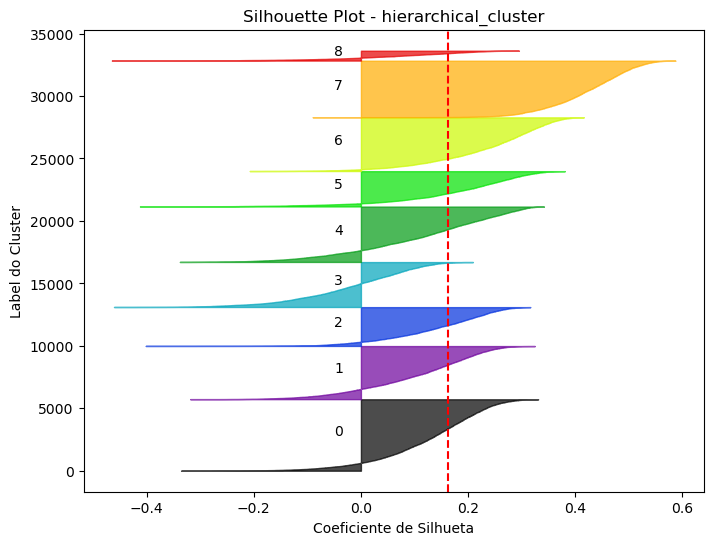

In [11]:
plot_silhouette(df, ['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products'], 'hierarchical_cluster')

In [ ]:
plot_silhouette(df, ['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products'], 'som_cluster')

TypeError: unhashable type: 'numpy.ndarray'